In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
import io
import matplotlib.pyplot as plt

In [36]:
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 09-08-2014-TO-08-08-2015IDEAALLN.csv to 09-08-2014-TO-08-08-2015IDEAALLN.csv
Saving 09-08-2015-TO-08-08-2016IDEAALLN.csv to 09-08-2015-TO-08-08-2016IDEAALLN.csv
Saving 09-08-2016-TO-08-08-2017IDEAALLN.csv to 09-08-2016-TO-08-08-2017IDEAALLN.csv
Saving 09-08-2017-TO-08-08-2018IDEAALLN.csv to 09-08-2017-TO-08-08-2018IDEAALLN.csv
Saving 09-08-2018-TO-07-08-2020IDEAALLN.csv to 09-08-2018-TO-07-08-2020IDEAALLN.csv


In [8]:
df1 = pd.read_csv(io.BytesIO(uploaded['09-08-2014-TO-08-08-2015IDEAALLN.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['09-08-2015-TO-08-08-2016IDEAALLN.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['09-08-2016-TO-08-08-2017IDEAALLN.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['09-08-2017-TO-08-08-2018IDEAALLN.csv']))
df5 = pd.read_csv(io.BytesIO(uploaded['09-08-2018-TO-07-08-2020IDEAALLN.csv']))

In [9]:
df = pd.concat([df1,df2,df3,df4,df5])

In [13]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = df['Date'].dt.strftime('%m')
df['Year'] = df['Date'].dt.strftime('%Y')
df['Day'] = df['Date'].dt.strftime('%d')

In [14]:
df['Op-Hi'] = df['Open Price'] - df['High Price']

In [21]:
df = df.sort_values(by=['Date'])

In [24]:
cols = ['Month', 'Year', 'Day']
df_x = df[cols]
df_y = df['Op-Hi']

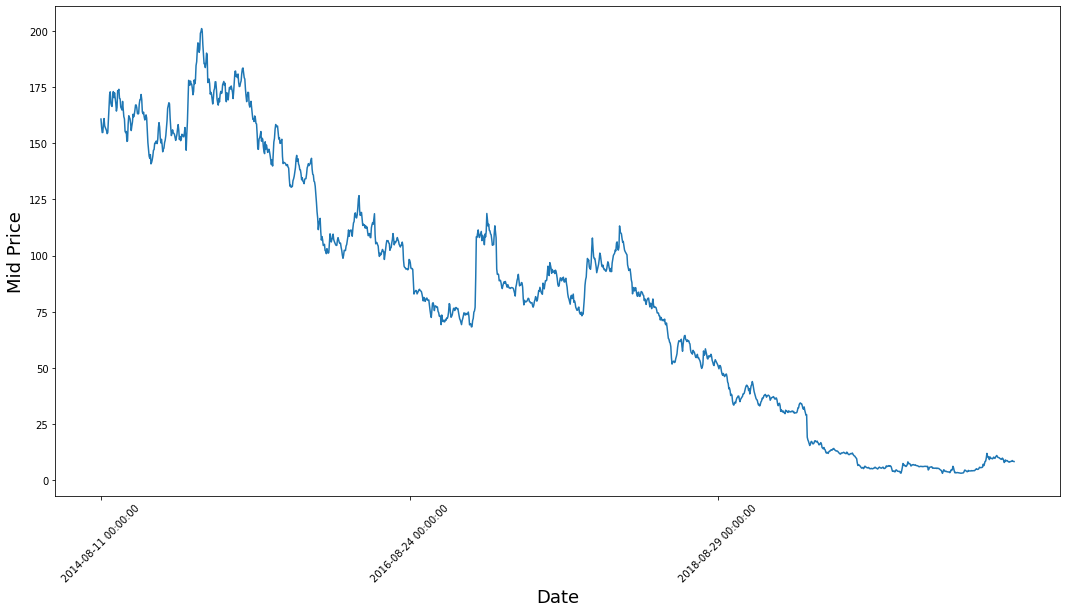

In [34]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low Price']+df['High Price'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.1,random_state=4)

In [43]:
x_train.shape

(1332, 3)

In [45]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[0], x_train.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train, epochs=20, batch_size=70, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20


ValueError: ignored

In [39]:
dataset = df.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

AttributeError: ignored